In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("house_prices.csv")
data

,Transaction,House age,Distance to MRT station,Number of convenience stores,Latitude,Longitude,House unit price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
fig, ax = plt.subplots()
ax.scatter(x=data['Longitude'], y=data['House unit price'])
# ax.scatter(x=data['House age'], y=data['House unit price'], c='r')

In [4]:
data.corr()

,Transaction,House age,Distance to MRT station,Number of convenience stores,Latitude,Longitude,House unit price
Transaction,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
House age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance to MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
House unit price,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [5]:
data.isnull().sum()

Transaction                     0
House age                       0
Distance to MRT station         0
Number of convenience stores    0
Latitude                        0
Longitude                       0
House unit price                0
dtype: int64

In [6]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [8]:
lin = LinearRegression()
lin.fit(x_train, y_train)

LinearRegression()

In [9]:
y_pred = lin.predict(x_test)
r2_score(y_test, y_pred)

0.6656511327071196

In [10]:
lin.coef_

array([ 5.30660634e+00, -2.80285277e-01, -4.85920871e-03,  1.09918419e+00,
        2.16055374e+02, -3.37419540e+01])

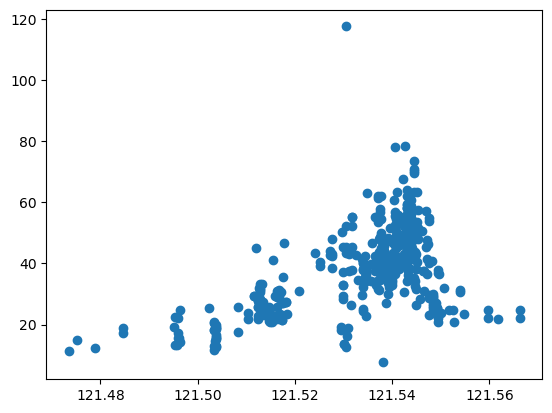

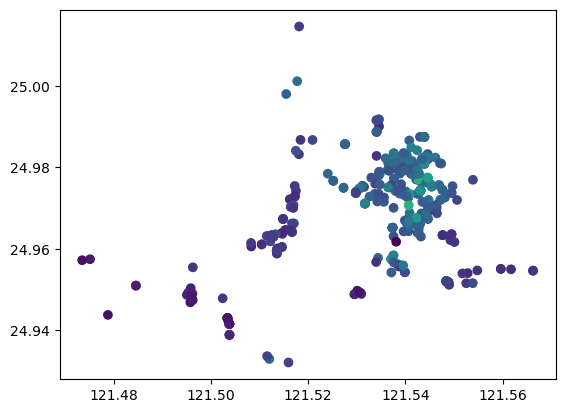

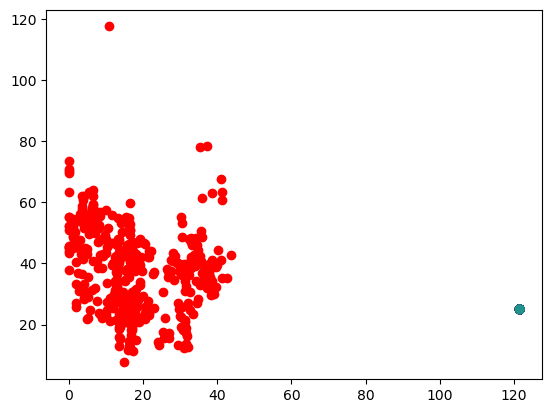

In [12]:
fig, ax = plt.subplots()
ax.scatter(x=data['Longitude'], y=data['Latitude'], c=data['House unit price'])
ax.scatter(x=data['House age'], y=data['House unit price'], c='r')
plt.show()